In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

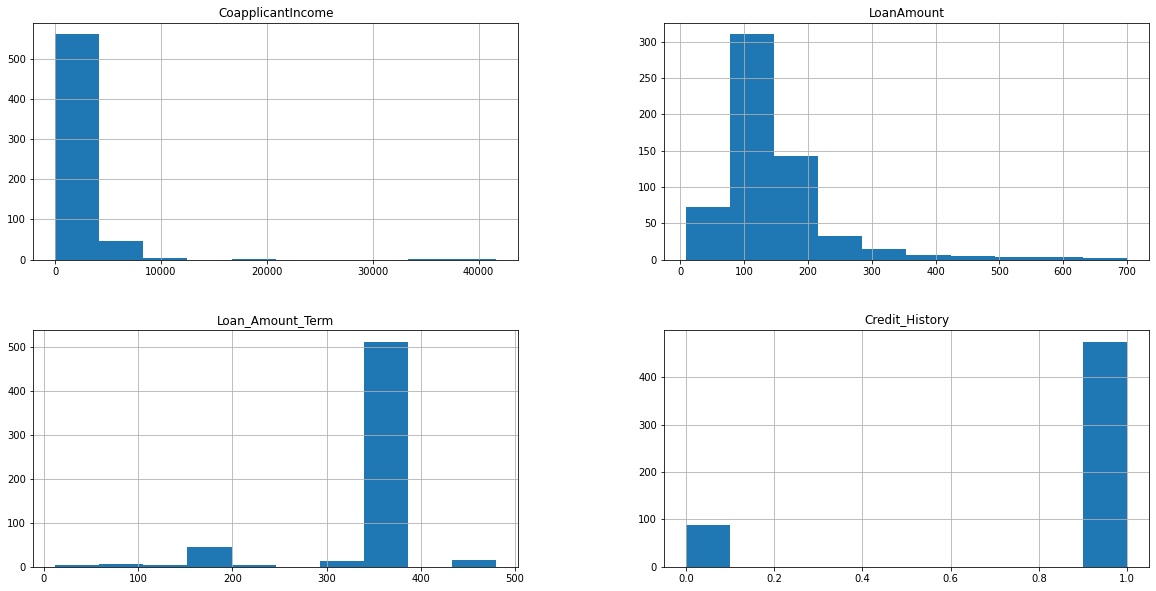

In [7]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show()

<Axes: >

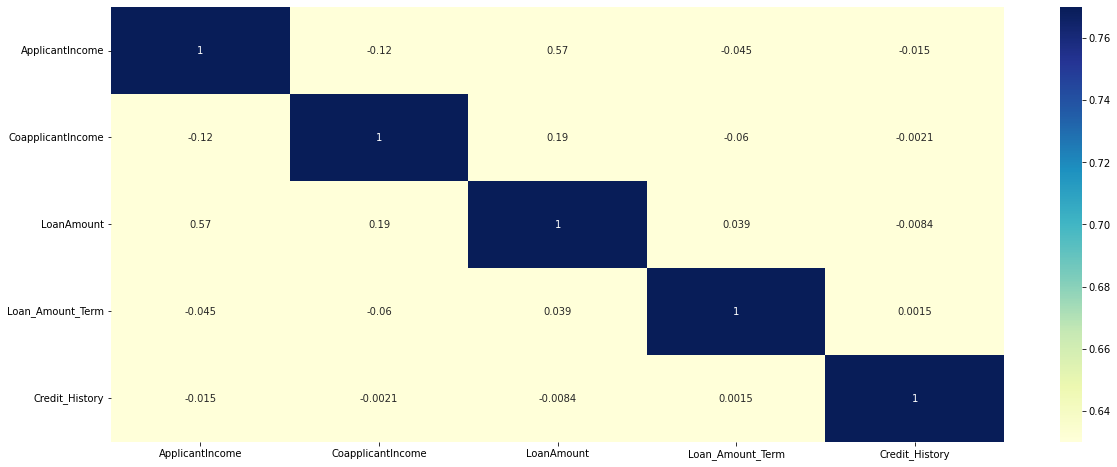

In [8]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmax=0.7,vmin=0.7,cmap='YlGnBu')

In [9]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Encoding

In [10]:
data=pd.get_dummies(data)

In [11]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
data['Credit_History']=le.fit_transform(data['Credit_History'])

In [14]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [15]:
data=data.dropna()

In [16]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


# Logistic Regression

In [17]:
y=data['Credit_History']
x=data.drop(['Credit_History'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_pred=model.predict(x_test)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred))



Accuracy = 0.7931034482758621


In [23]:
confusion_matrix(y_test,y_pred)

array([[  0,  19,   0],
       [  0, 115,   0],
       [  0,  11,   0]])

# MSE and R2_Score

In [24]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [25]:
model = lr.fit(x_train,y_train)

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  0.18729393408350042
R2 is :  0.08122842648026252


# kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [29]:
metric_k

[0.7379310344827587,
 0.7310344827586207,
 0.7655172413793103,
 0.7793103448275862,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621,
 0.7931034482758621]

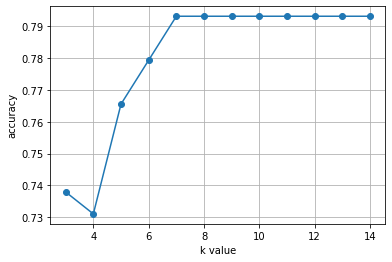

In [30]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [31]:
classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

In [32]:
print('Accuracy =',accuracy_score(y_test,y_pred))


Accuracy = 0.7931034482758621


# SVM

In [33]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [34]:
y_pred_svm=svmclf.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.7931034482758621


In [37]:
print(confusion_matrix(y_test,y_pred_svm))

[[  0  19   0]
 [  0 115   0]
 [  0  11   0]]


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt=dt_clf.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred_dt))

accuracy= 0.7448275862068966


In [40]:
print(confusion_matrix(y_test,y_pred_dt))

[[  6  13   0]
 [ 10 102   3]
 [  1  10   0]]


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf=rf_clf.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.7931034482758621


In [43]:
print(confusion_matrix(y_test,y_pred_rf))

[[  3  16   0]
 [  3 112   0]
 [  0  11   0]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [45]:
y_pred_rf=rf_clf.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.7793103448275862


In [46]:
print(confusion_matrix(y_test,y_pred_rf))

[[  5  14   0]
 [  7 108   0]
 [  0  11   0]]


# Hold Out Technique

In [47]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
score_lr=lrmodel.score(x_test,y_test)

In [49]:
score_lr

0.7931034482758621

# K-fold cross validation

In [50]:
from sklearn.model_selection import KFold

In [51]:
kfold_validator=KFold(10)

In [52]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Test index: ',test_index)

Training index:  [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 3

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cv_score=cross_val_score(lrmodel,x,y,cv=kfold_validator)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [55]:
cv_score

array([0.77586207, 0.77586207, 0.79310345, 0.84482759, 0.79310345,
       0.79310345, 0.79310345, 0.68965517, 0.75438596, 0.77192982])

In [56]:
np.mean(cv_score)

0.7784936479128857

# Stratified k-fold cross validation

In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
skfold_validator=StratifiedKFold(n_splits=10)

In [59]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index: ',train_index)
    print('Test index: ',test_index)

Training index:  [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 3

In [60]:
skcv_score=cross_val_score(lrmodel,x,y,cv=skfold_validator)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [61]:
skcv_score

array([0.77586207, 0.75862069, 0.77586207, 0.77586207, 0.75862069,
       0.77586207, 0.77586207, 0.77586207, 0.78947368, 0.80701754])

In [62]:
np.mean(skcv_score)

0.7768905021173624

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
prediction = rf_classifier.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.7931034482758621


In [65]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)

In [66]:
prediction2 = model.predict(x_test)

In [67]:
print(accuracy_score(y_test,prediction2))

0.7931034482758621


In [68]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [69]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [70]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [71]:
best_random_grid = rf_randomcv.best_estimator_
y_pred = best_random_grid.predict(x_test)
accuracy_score(y_test,y_pred)

0.8068965517241379

In [72]:
[rf_randomcv.best_params_['min_samples_leaf'],rf_randomcv.best_params_['min_samples_leaf']+1,
                                  rf_randomcv.best_params_['min_samples_leaf']+2,
                                  rf_randomcv.best_params_['min_samples_leaf']+4]

[1, 2, 3, 5]

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

In [74]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_for

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [230],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [75]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=230, n_estimators=1600)

In [76]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [79]:
data2=pd.read_csv('sample_submission_49d68Cx.csv')

In [80]:
data2.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction2
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN


In [83]:
data = pd.read_csv('train_ctrUa4K.csv')
data2 = pd.read_csv('sample_submission_49d68Cx.csv')
  
# using merge function by setting how='left'
output2 = pd.merge(data, data2, 
                   )
  
# displaying result
print(output2)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [93]:
output2.to_csv('new_dataset.csv')
output2.to_csv(r"D:\Users\HP\Downloads\New folder\new_dataset.csv")